### Cargamos las librerias necesarias

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## Cargamos los datos

In [2]:
url_edad  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario_T.csv"
data_edad = pd.read_csv(url_edad)
data_edad.tail(5)

,Grupo de edad,<=39,40-49,50-59,60-69,70-79,80-89,>=90
48,2020-05-27,16,43,81,150,250,218,83
49,2020-05-28,18,44,89,165,259,228,87
50,2020-05-29,19,46,94,173,279,242,91
51,2020-05-30,23,48,97,185,295,255,94
52,2020-05-31,28,50,105,189,309,275,98


## Cantidad de casos, según rango etario, a lo largo de los días

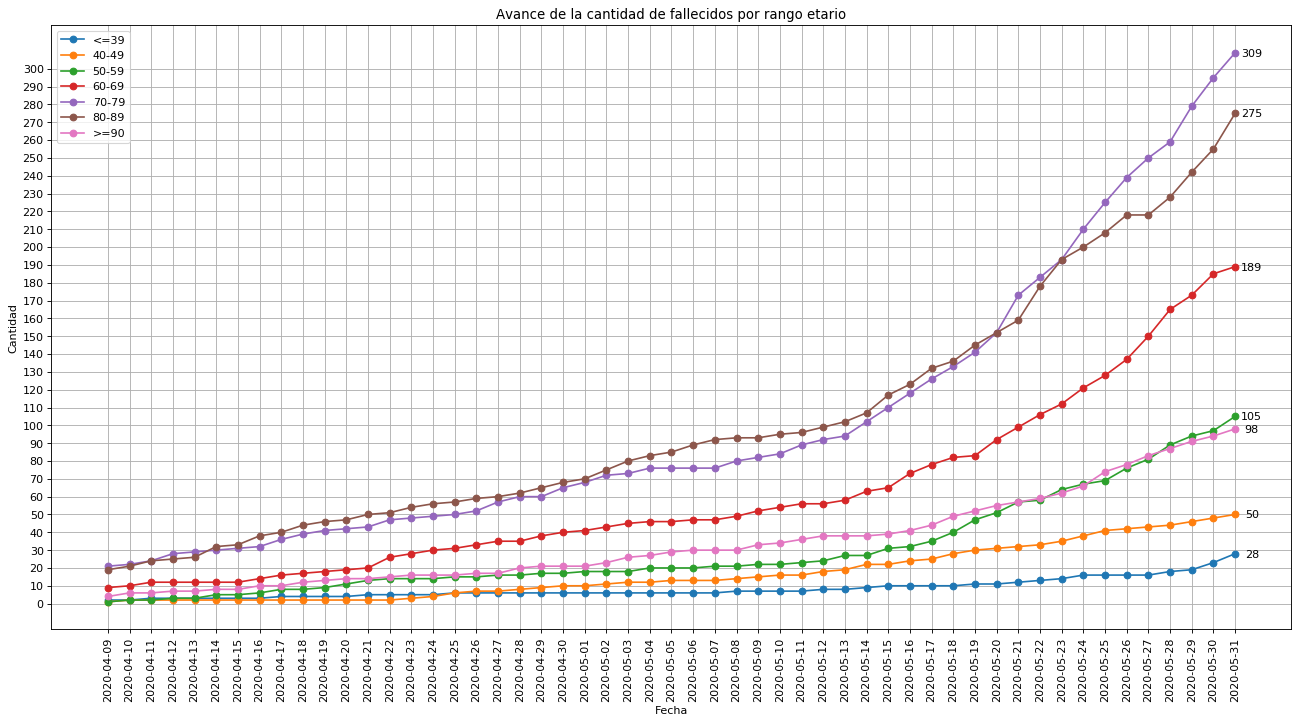

In [3]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(15, -5),
            textcoords="offset points",
            ha ='center', va='bottom')

plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(data_edad["Grupo de edad"], data_edad["<=39"],  "o-")
plt.plot(data_edad["Grupo de edad"], data_edad["40-49"], "o-")
plt.plot(data_edad["Grupo de edad"], data_edad["50-59"], "o-")
plt.plot(data_edad["Grupo de edad"], data_edad["60-69"], "o-")
plt.plot(data_edad["Grupo de edad"], data_edad["70-79"], "o-")
plt.plot(data_edad["Grupo de edad"], data_edad["80-89"], "o-")
plt.plot(data_edad["Grupo de edad"], data_edad[">=90"],  "o-")
plt.xticks(data_edad["Grupo de edad"], rotation='vertical')
plt.legend(data_edad.columns[1:])
plt.title("Avance de la cantidad de fallecidos por rango etario")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.yticks(np.arange(0, max(data_edad["70-79"]), 10))
plt.grid()
### ----- DATO ULTIMO DIA ----- ###
last_x_ticks = data_edad["Grupo de edad"].tail(1).tolist()
last_39_tick = data_edad["<=39"].tail(1).tolist()
last_40_tick = data_edad["40-49"].tail(1).tolist()
last_50_tick = data_edad["50-59"].tail(1).tolist()
last_60_tick = data_edad["60-69"].tail(1).tolist()
last_70_tick = data_edad["70-79"].tail(1).tolist()
last_80_tick = data_edad["80-89"].tail(1).tolist()
last_90_tick = data_edad[">=90"].tail(1).tolist()
labelonbars(last_x_ticks, last_39_tick)
labelonbars(last_x_ticks, last_40_tick)
labelonbars(last_x_ticks, last_50_tick)
labelonbars(last_x_ticks, last_60_tick)
labelonbars(last_x_ticks, last_70_tick)
labelonbars(last_x_ticks, last_80_tick)
labelonbars(last_x_ticks, last_90_tick)
### ----- DATO ULTIMO DIA ----- ###
plt.show()

## Cantidadad total de cada rango etario

In [4]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 1),
            textcoords="offset points",
            ha ='center', va='bottom')

In [5]:
total_menos39   = data_edad["<=39"].tail(1).values[0]
total_40_49     = data_edad["40-49"].tail(1).values[0]
total_50_59     = data_edad["50-59"].tail(1).values[0]
total_60_69     = data_edad["60-69"].tail(1).values[0]
total_70_79     = data_edad["70-79"].tail(1).values[0]
total_80_89     = data_edad["80-89"].tail(1).values[0]
total_mayor90   = data_edad[">=90"].tail(1).values[0]

Y               = [total_menos39, total_40_49, total_50_59, total_60_69, total_70_79, total_80_89, total_mayor90]
X               = ["<=39", "40-49", "50-59", "60-69", "70-79", "80-89", ">=90"]

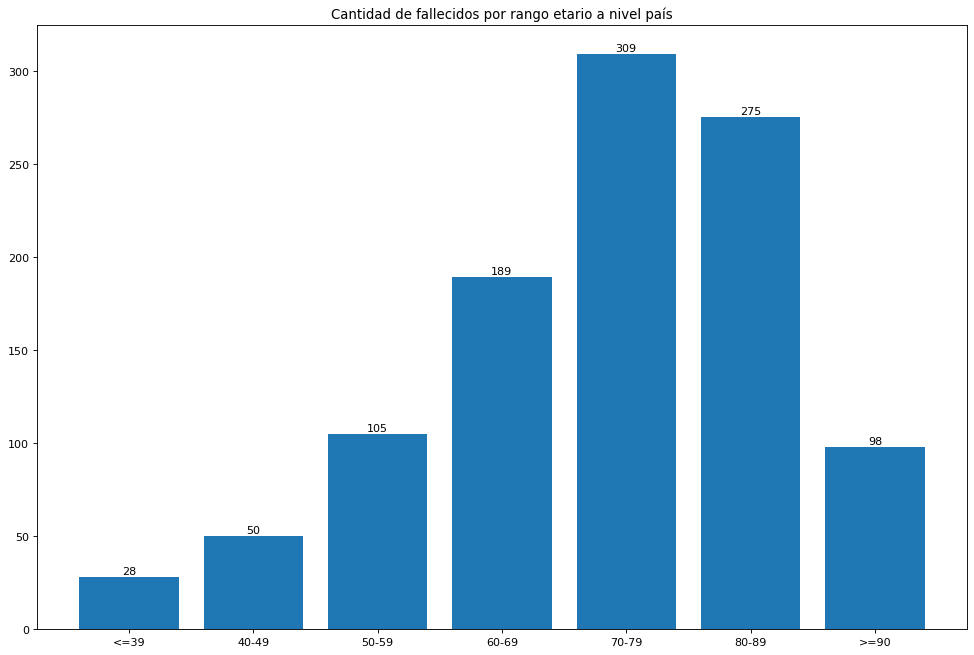

In [6]:
plt.figure(figsize=(15, 10), dpi=80)
plt.bar(X, Y)
plt.title("Cantidad de fallecidos por rango etario a nivel país")
labelonbars(X, Y)
plt.show()

## Porcentaje de fallecidos para cada rango etario

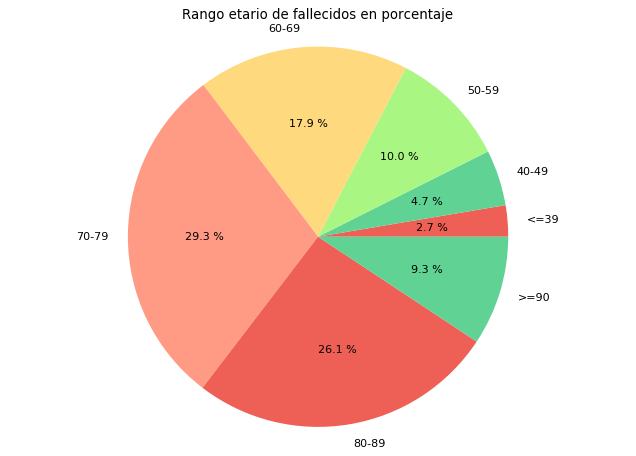

In [7]:
plt.figure(figsize=(10, 7), dpi=80)
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
plt.pie(Y, labels=X, autopct="%0.1f %%", colors=colores)
plt.title("Rango etario de fallecidos en porcentaje")
plt.axis("equal")
plt.show()

# Fallecidos por región

In [8]:
url_region  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo_T.csv"
data_region = pd.read_csv(url_region)
data_region = data_region.rename(columns={'Region':'Fecha'})
data_region.tail(5)

,Fecha,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
66,2020-05-27,7,11,25,0,2,58,595,14,15,22,10,45,6,13,0,18,841
67,2020-05-28,7,12,28,0,2,60,638,14,15,22,10,45,6,13,0,18,890
68,2020-05-29,7,14,28,0,2,61,685,14,15,22,11,47,6,13,0,19,944
69,2020-05-30,7,18,29,0,2,63,728,16,15,23,11,47,6,13,0,19,997
70,2020-05-31,7,21,31,0,2,66,775,18,15,23,11,47,6,13,0,19,1054


## Cantidad de fallecidos por región a lo largo de los días

In [9]:
fechas   = data_region["Fecha"].values.tolist()
last_day = fechas[len(fechas)-1]
regiones = data_region.columns[1:-1]

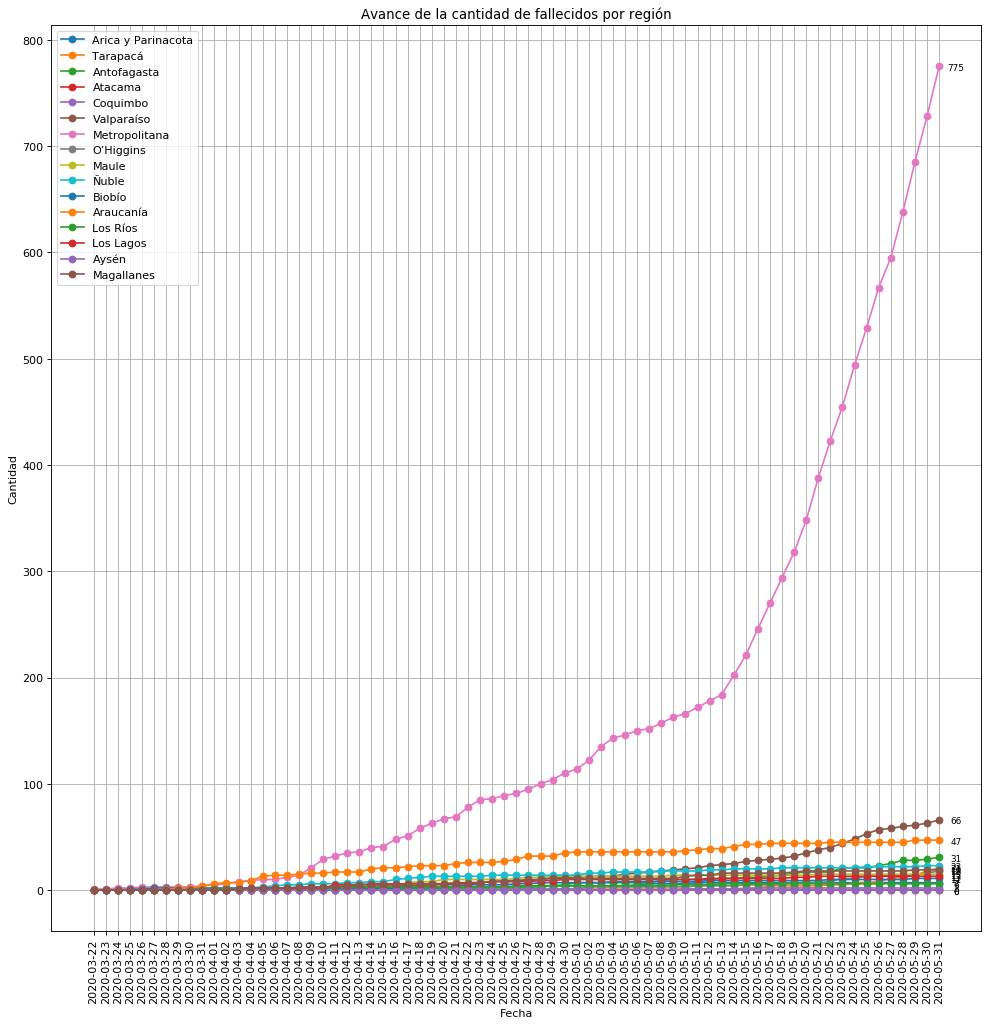

In [10]:
def labelonpoints(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(15, -5),
            textcoords="offset points",
            ha ='center', va='bottom', size='8')

plt.figure(figsize=(15, 15), dpi=80)

for region in regiones:
    fallecidos            = data_region[region].values.tolist()
    fallecidos_last_day   = fallecidos[len(fallecidos)-1]
    plt.plot(fechas, fallecidos,  "o-")
    labelonpoints([last_day], [fallecidos_last_day])

plt.legend(regiones)
plt.title("Avance de la cantidad de fallecidos por región")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.xticks(fechas, rotation='vertical')
#plt.yticks(np.arange(0, max(data_region["Metropolitana"])+5, 5))
plt.grid()
#plt.yscale('log')
plt.show()

## Cantidad de fallecidos por región

In [11]:
Y = data_region.tail(1).values.tolist()[0]
Y = Y[1:-1]

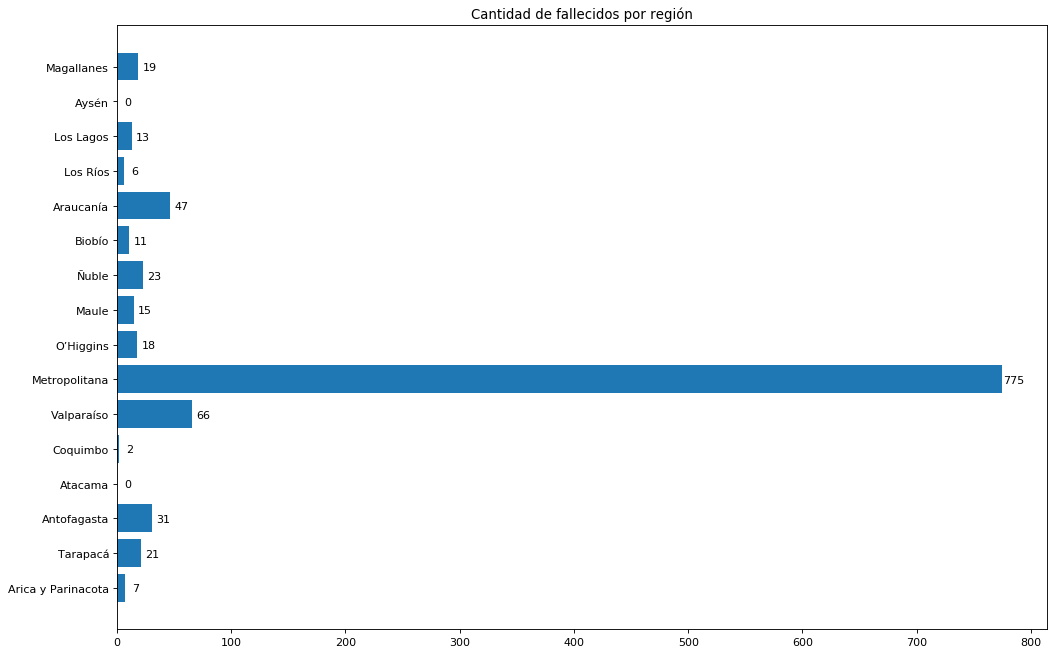

In [12]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(Y[i], X[i]),
            xytext =(10, -5),
            textcoords="offset points",
            ha ='center', va='bottom')
        
plt.figure(figsize=(15, 10), dpi=80)
plt.barh(regiones, Y)
plt.title("Cantidad de fallecidos por región")
labelonbars(regiones, Y)
plt.show()

## Distribución de fallecidos por región

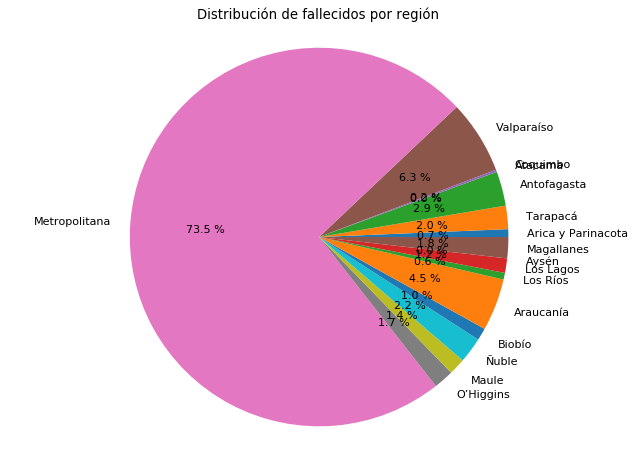

In [14]:
plt.figure(figsize=(10, 7), dpi=80)
plt.pie(Y, labels=regiones, autopct="%0.1f %%")
plt.title("Distribución de fallecidos por región")
plt.axis("equal")
plt.show()